In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('../files/laptops.csv')

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [11]:
df[['ram','storage','screen','final_price']]

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [16]:
# Qustion 1: one column from the group with missing columns -> screen column

# df.isnull().sum()

df[['ram','storage','screen','final_price']].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [13]:
# Does final_price have a long tail? Yes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

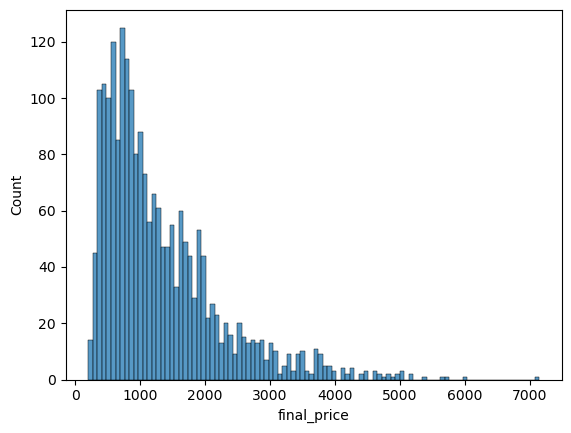

In [15]:
sns.histplot(df.final_price, bins=100)

In [19]:
# Question 2: What's the median (50% percentile) for variable 'ram'? -> 16

df[['ram']].median()

ram    16.0
dtype: float64

#### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.



In [44]:
base = ['ram','storage','screen','final_price']

df_filtered = df[['ram','storage','screen','final_price']]

In [29]:
n = len(df_filtered)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test # rest of the data used to train

# n_val, n_test, n_train
n, n_val + n_test + n_train

(2160, 2160)

In [21]:
df_filtered

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [26]:
idx = np.arange(n)
# df_filtered.iloc[idx[:10]]
np.random.seed(42)
np.random.shuffle(idx)
df_filtered.iloc[idx[:10]]

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
1780,16,1000,15.6,1183.68
1672,16,500,14.0,1123.00
1717,8,512,15.6,423.58
926,32,512,16.0,2866.16
2157,32,1000,17.3,3399.99


In [35]:
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train: n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

In [38]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [39]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [40]:
# Reset the indexes
df_train = df_train.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [41]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


In [42]:
df_filtered.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [92]:
# Create the logarithm of the required final_price values in each data set and create new variables of the data

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [93]:
len(y_train)

1296

In [103]:
# Train the model with screen null values as 0

def prepare_X_zeros(df):
    df = df.copy() # dont want to modify the data in place so take a copy

    df_num = df[base].fillna(0)

    X = df_num.values

    return X

In [104]:
X_train = prepare_X_zeros(df_train)

In [105]:
X_train

array([[  32.  , 1000.  ,   15.6 , 1123.29],
       [   4.  ,   64.  ,   14.1 ,  201.05],
       [  32.  , 1000.  ,   14.  ,  997.74],
       ...,
       [  16.  ,  512.  ,   15.6 , 1059.  ],
       [  16.  ,  512.  ,   14.  , 1671.  ],
       [  16.  ,  512.  ,   14.  , 1056.  ]])

In [100]:
# Train the model with screen null values as 0


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [106]:
w0, w = train_linear_regression(X_train, y_train)

In [107]:
w0, w

(6.303689704240137,
 array([-0.00103762,  0.00011921, -0.01393199,  0.00062561]))

In [46]:
prepare_X(df_train)

array([[  32.  , 1000.  ,   15.6 , 1123.29],
       [   4.  ,   64.  ,   14.1 ,  201.05],
       [  32.  , 1000.  ,   14.  ,  997.74],
       ...,
       [  16.  ,  512.  ,   15.6 , 1059.  ],
       [  16.  ,  512.  ,   14.  , 1671.  ],
       [  16.  ,  512.  ,   14.  , 1056.  ]])

In [59]:
def rmse(y, y_pred):
    error = y - y_pred # Prediction - the actual value
    se = error ** 2 # square the error value
    mse = se.mean() # get the mean value of all the error values together
    return np.sqrt(mse) # get the square root of that mean

In [108]:
y_pred = w0 + X_train.dot(w)

score = rmse(y_train, y_pred)
score

0.23912564235410108

<Axes: ylabel='Count'>

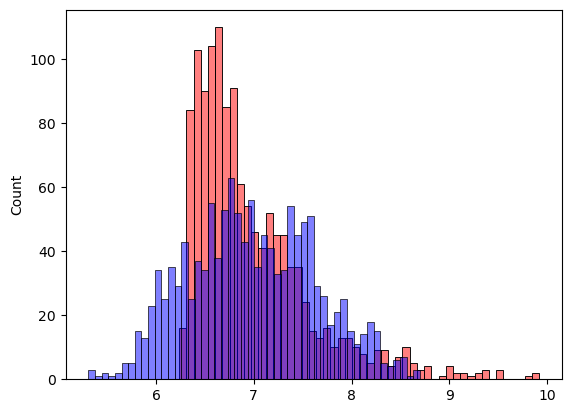

In [109]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50) # Prediction variable in Red
sns.histplot(y_train, color='blue', alpha=0.5,  bins=50) # Target variables in blue

In [65]:
df_train[['screen']].median()

screen    15.6
dtype: float64

In [132]:
# Train the model with screen null values as 0

def prepare_X_median(df):
    df = df.copy()  # Don't want to modify the data in place, so take a copy

    # Calculate the median of the 'screen' column
    med_screen_size = df['screen'].median()

    # Fill NaN values in the 'screen' column with the median value
    df['screen'] = df['screen'].fillna(med_screen_size)

    X = df.values

    # Return the updated DataFrame
    return X

In [133]:
X_train_med = prepare_X_median(df_train)

In [134]:
X_train_med

array([[  32.  , 1000.  ,   15.6 , 1123.29],
       [   4.  ,   64.  ,   14.1 ,  201.05],
       [  32.  , 1000.  ,   14.  ,  997.74],
       ...,
       [  16.  ,  512.  ,   15.6 , 1059.  ],
       [  16.  ,  512.  ,   14.  , 1671.  ],
       [  16.  ,  512.  ,   14.  , 1056.  ]])

In [135]:
w0, w = train_linear_regression(X_train_med, y_train)

In [136]:
w0, w

(6.348437764401444,
 array([-0.00095964,  0.00012135, -0.01699832,  0.00062543]))

In [137]:
y_pred = w0 + X_train_med.dot(w)

score = rmse(y_train, y_pred)
score

0.23908735665927092

In [ ]:
# 0.23912564235410108 -> using 0's

# using the median value is slightly better!, but using rounded scores below they are equally good.

In [140]:

#prepare the training data set
X_train_zeros = prepare_X_zeros(df_train)
# get the w0 and w weights values from the training data set
w0z, wz = train_linear_regression(X_train_zeros, y_train)



#prepare the training data set
X_train_median = prepare_X_median(df_train)
# get the w0 and w weights values from the training data set
w0m, wm = train_linear_regression(X_train_median, y_train)




# prepare the validation data set for zero test
X_val_zeros = prepare_X_zeros(df_val)
# get the predictions for the validation data set using the training weights
y_pred_zeros = w0z + X_val_zeros.dot(wz)

# use RMSE to check the erro value
rmseZeros = rmse(y_val, y_pred_zeros)




# prepare the validation data set for median test
X_val_median = prepare_X_zeros(df_val)
# get the predictions for the validation data set using the training weights
y_pred_median = w0m + X_val_median.dot(wm)

# use RMSE to check the erro value
rmseMedian = rmse(y_val, y_pred_median)

round(rmseZeros, 2), round(rmseMedian, 2)


(0.24, 0.24)

Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.01
    1
    10
    100
